# WORKFLOW

1. GET DATA
2. DATA ANALYSIS AND EDA
3. FEATURE ENGINEERING

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
dataset = pd.read_csv('Top_rated_movies.csv')

In [50]:
dataset

,Unnamed: 0,id,title,vote_average,vote_count,release_date,popularity
0,0,278,The Shawshank Redemption,8.711,29158,1994-09-23,25.3318
1,1,238,The Godfather,8.685,22026,1972-03-14,26.3705
2,2,240,The Godfather Part II,8.571,13315,1974-12-20,13.4802
3,3,424,Schindler's List,8.566,16836,1993-12-15,10.6071
4,4,389,12 Angry Men,8.548,9503,1957-04-10,9.0143
...,...,...,...,...,...,...,...
9975,9975,11310,City Slickers II: The Legend of Curly's Gold,5.300,327,1994-06-10,1.2015
9976,9976,9651,Supergirl,5.300,631,1984-07-01,3.0597
9977,9977,37534,The New Daughter,5.301,370,2009-12-18,1.6478
9978,9978,665828,Bigbug,5.300,447,2022-02-11,3.5664


In [51]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9980 non-null   int64  
 1   id            9980 non-null   int64  
 2   title         9980 non-null   object 
 3   vote_average  9980 non-null   float64
 4   vote_count    9980 non-null   int64  
 5   release_date  9978 non-null   object 
 6   popularity    9980 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 545.9+ KB


In [52]:
dataset.isnull().sum() 

Unnamed: 0      0
id              0
title           0
vote_average    0
vote_count      0
release_date    2
popularity      0
dtype: int64

In [53]:
dataset = dataset.drop('Unnamed: 0', axis = 1)


In [54]:
dataset.dropna(subset=['release_date'], inplace=True)

In [55]:
dataset.duplicated().value_counts()

False    9973
True        5
Name: count, dtype: int64

In [56]:
dataset =dataset.drop_duplicates()

In [57]:
# 1. Convert to datetime format
dataset['release_date'] = pd.to_datetime(dataset['release_date'])

# 2. Extract components using .dt accessor
dataset['year'] = dataset['release_date'].dt.year
dataset['month'] = dataset['release_date'].dt.month
dataset['day'] = dataset['release_date'].dt.day

In [58]:
dataset

,id,title,vote_average,vote_count,release_date,popularity,year,month,day
0,278,The Shawshank Redemption,8.711,29158,1994-09-23,25.3318,1994,9,23
1,238,The Godfather,8.685,22026,1972-03-14,26.3705,1972,3,14
2,240,The Godfather Part II,8.571,13315,1974-12-20,13.4802,1974,12,20
3,424,Schindler's List,8.566,16836,1993-12-15,10.6071,1993,12,15
4,389,12 Angry Men,8.548,9503,1957-04-10,9.0143,1957,4,10
...,...,...,...,...,...,...,...,...,...
9975,11310,City Slickers II: The Legend of Curly's Gold,5.300,327,1994-06-10,1.2015,1994,6,10
9976,9651,Supergirl,5.300,631,1984-07-01,3.0597,1984,7,1
9977,37534,The New Daughter,5.301,370,2009-12-18,1.6478,2009,12,18
9978,665828,Bigbug,5.300,447,2022-02-11,3.5664,2022,2,11


In [59]:
dataset = dataset.drop('release_date', axis = 1)
dataset

,id,title,vote_average,vote_count,popularity,year,month,day
0,278,The Shawshank Redemption,8.711,29158,25.3318,1994,9,23
1,238,The Godfather,8.685,22026,26.3705,1972,3,14
2,240,The Godfather Part II,8.571,13315,13.4802,1974,12,20
3,424,Schindler's List,8.566,16836,10.6071,1993,12,15
4,389,12 Angry Men,8.548,9503,9.0143,1957,4,10
...,...,...,...,...,...,...,...,...
9975,11310,City Slickers II: The Legend of Curly's Gold,5.300,327,1.2015,1994,6,10
9976,9651,Supergirl,5.300,631,3.0597,1984,7,1
9977,37534,The New Daughter,5.301,370,1.6478,2009,12,18
9978,665828,Bigbug,5.300,447,3.5664,2022,2,11


# Exploratory Data Analysis

Text(0.5, 1.0, 'Vote_average- Movie Ratings')

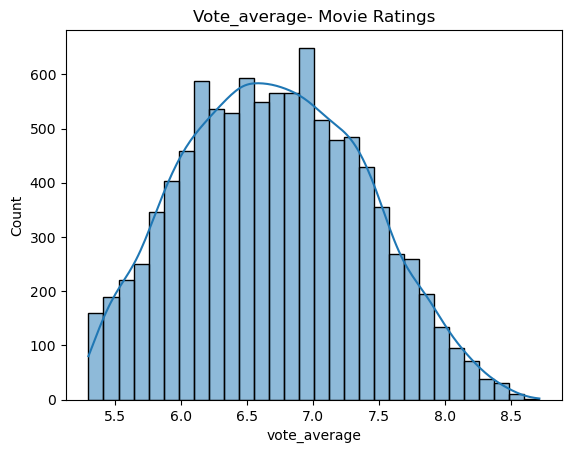

In [60]:
plt.Figure(figsize=(10,6))
sns.histplot(dataset['vote_average'],bins=30, kde= True)
plt.title('Vote_average- Movie Ratings')


Text(0.5, 1.0, 'Distribution of Vote Counts')

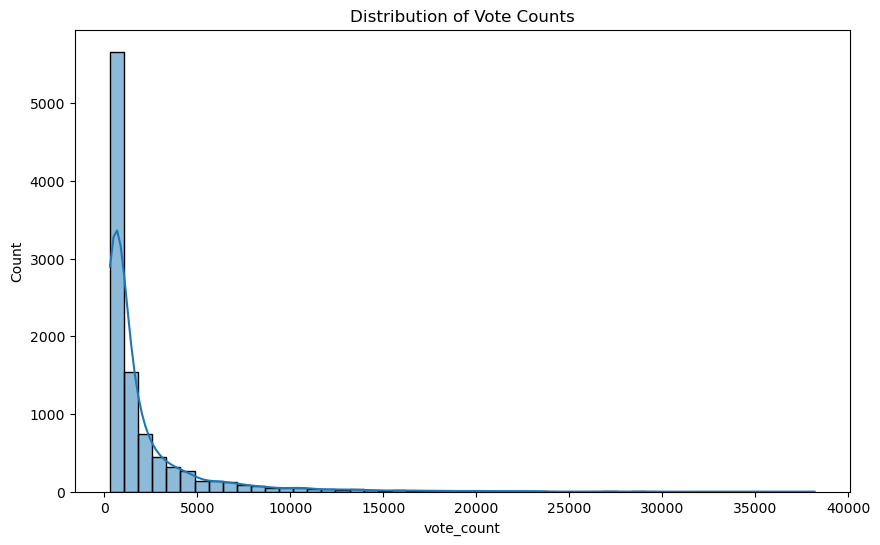

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['vote_count'], bins=50, kde=True)
plt.title('Distribution of Vote Counts')

Text(0.5, 1.0, 'Correlation Heatmap')

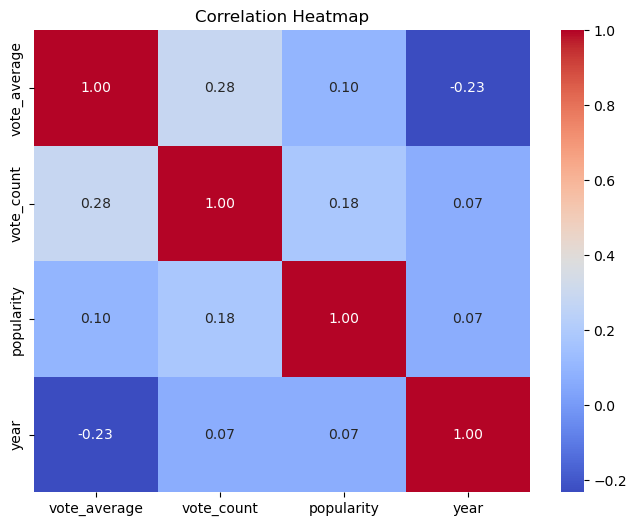

In [65]:
# To check for correlation between numeric columns
plt.figure(figsize=(8, 6))
correlation_matrix = dataset[['vote_average', 'vote_count', 'popularity', 'year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Relationship: Vote Average vs Vote Count')

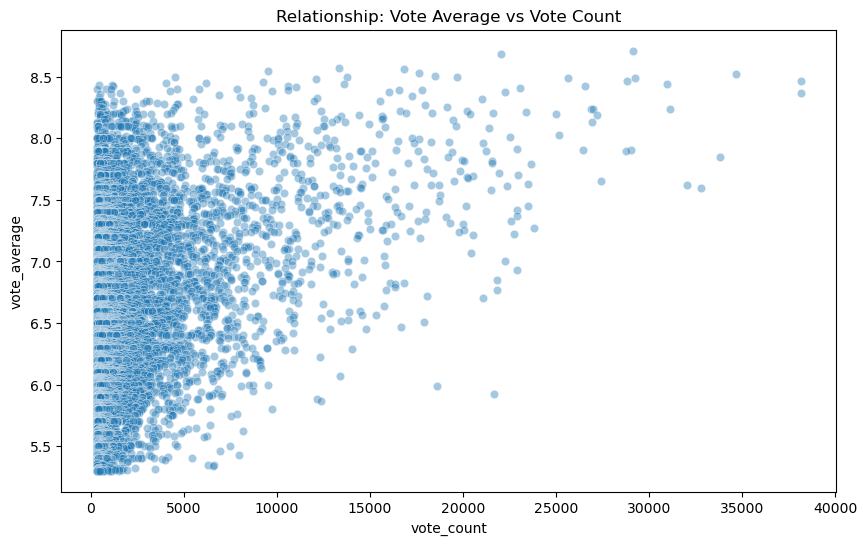

In [64]:
# This helps see if "popular" movies get higher or lower scores than niche ones.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='vote_count', y='vote_average', alpha=0.4)
plt.title('Relationship: Vote Average vs Vote Count')

## FEATURE ENGINEERING

In [66]:
dataset

,id,title,vote_average,vote_count,popularity,year,month,day
0,278,The Shawshank Redemption,8.711,29158,25.3318,1994,9,23
1,238,The Godfather,8.685,22026,26.3705,1972,3,14
2,240,The Godfather Part II,8.571,13315,13.4802,1974,12,20
3,424,Schindler's List,8.566,16836,10.6071,1993,12,15
4,389,12 Angry Men,8.548,9503,9.0143,1957,4,10
...,...,...,...,...,...,...,...,...
9975,11310,City Slickers II: The Legend of Curly's Gold,5.300,327,1.2015,1994,6,10
9976,9651,Supergirl,5.300,631,3.0597,1984,7,1
9977,37534,The New Daughter,5.301,370,1.6478,2009,12,18
9978,665828,Bigbug,5.300,447,3.5664,2022,2,11


In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9979
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9973 non-null   int64  
 1   title         9973 non-null   object 
 2   vote_average  9973 non-null   float64
 3   vote_count    9973 non-null   int64  
 4   popularity    9973 non-null   float64
 5   year          9973 non-null   int32  
 6   month         9973 non-null   int32  
 7   day           9973 non-null   int32  
dtypes: float64(2), int32(3), int64(2), object(1)
memory usage: 584.4+ KB


In [68]:
# To get weighted rating (IMDb Formula)
# This is better than 'vote_average' because it balances score with popularity

v = dataset['vote_count']
R = dataset['vote_average']
C = dataset['vote_average'].mean()
m = dataset['vote_count'].quantile(0.80) # Using top 20% of vote count as threshold

dataset['weighted_rating'] = (v/(v+m) * R) + (m/(v+m) * C)

In [69]:
# Binary flag (1/0) if the movie is likely a sequel (e.g., "Godfather Part II")
sequel_keywords = r'Part|II|III|IV|Vol|2|3|4'
dataset['is_sequel'] = dataset['title'].str.contains(sequel_keywords, regex=True).astype(int)

In [70]:
# Combine popularity and rating into a single success metric
dataset['engagement_score'] = dataset['popularity'] * dataset['vote_average']

In [71]:
# Categorize movies into 4 tiers based on popularity
dataset['popularity_tier'] = pd.qcut(dataset['popularity'], q=4, 
                                     labels=['Bronze', 'Silver', 'Gold', 'Platinum'])

In [72]:
dataset

,id,title,vote_average,vote_count,popularity,year,month,day,weighted_rating,is_sequel,engagement_score,popularity_tier
0,278,The Shawshank Redemption,8.711,29158,25.3318,1994,9,23,8.546163,0,220.665310,Platinum
1,238,The Godfather,8.685,22026,26.3705,1972,3,14,8.475210,0,229.027793,Platinum
2,240,The Godfather Part II,8.571,13315,13.4802,1974,12,20,8.265197,1,115.538794,Platinum
3,424,Schindler's List,8.566,16836,10.6071,1993,12,15,8.316227,0,90.860419,Platinum
4,389,12 Angry Men,8.548,9503,9.0143,1957,4,10,8.150957,1,77.054236,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...
9975,11310,City Slickers II: The Legend of Curly's Gold,5.300,327,1.2015,1994,6,10,6.551255,1,6.367950,Bronze
9976,9651,Supergirl,5.300,631,3.0597,1984,7,1,6.434049,0,16.216410,Silver
9977,37534,The New Daughter,5.301,370,1.6478,2009,12,18,6.533351,0,8.734988,Bronze
9978,665828,Bigbug,5.300,447,3.5664,2022,2,11,6.502209,0,18.901920,Gold


## What these new features tell you:

- weighted_rating: Helps you identify movies that are genuinely high-rated by a large crowd, rather than niche movies with only a few votes.

- is_sequel: Allows you to compare the performance of originals vs. sequels.

- engagement_score: Useful if you want to find "The Absolute Best" (movies that are both highly rated AND highly popular).

In [73]:
# Save the final cleaned dataset
dataset.to_csv('Top_Rated_Movies_Cleaned.csv', index=False)